In [6]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [24]:
iris = load_iris()

In [25]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [26]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)

In [28]:
data_class = iris.target

In [30]:
del data['petal length (cm)']
del data['petal width (cm)']

In [18]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [34]:
lda = LinearDiscriminantAnalysis()

In [35]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [38]:
res = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [39]:
res

,0,1
0,1,1
1,2,2
2,0,0
3,0,0
4,2,2
5,0,0
6,1,1
7,2,2
8,2,2
9,0,0


In [40]:
from sklearn.metrics import accuracy_score

In [90]:
pred = lda.predict(X_test)

In [95]:
lda.means_

array([[5.03157895, 3.45526316],
       [5.85789474, 2.74473684],
       [6.53055556, 2.94166667]])

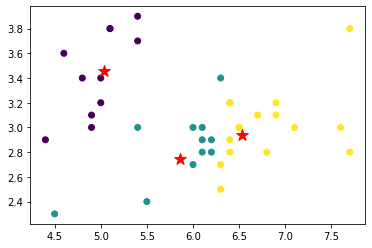

In [96]:
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=pred)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

In [60]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [81]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(data)

In [65]:
train = data[['sepal length (cm)', 'sepal width (cm)']]

In [62]:
scaler = StandardScaler()

In [66]:
X_scaled = scaler.fit_transform(train)

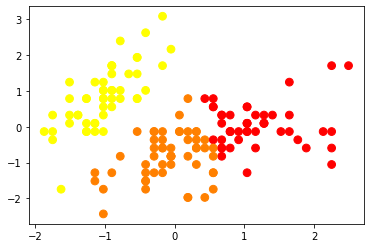

In [80]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)